# 초음파 광물 예측

### 데이터

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
import pandas as pd
df = pd.read_csv('sonar.csv', header=None)
# df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df[60].values)

In [6]:
X = df.iloc[:,:-1].values
X.shape

(208, 60)

### test,train 으로 나누기

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y_encoded,stratify=y_encoded,random_state=seed
)

In [8]:
X_train.shape,X_test.shape

((156, 60), (52, 60))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
model = Sequential([
    Dense(24, input_dim=60, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
                loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy']
            )

In [11]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs=200, batch_size=10,verbose=0)

In [12]:
acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Accuracy: {acc[1]:.4f}")

2/2 - 0s - loss: 0.5734 - accuracy: 0.8269
Accuracy: 0.8269


### 그래프 그리기

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

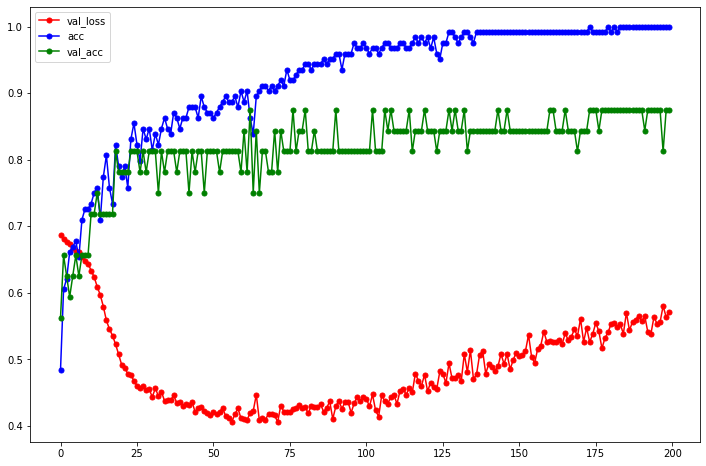

In [16]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, "o-", c='red',markersize=5,label="val_loss")
plt.plot(x_len, y_acc, "o-", c='blue',markersize=5,label="acc")
plt.plot(x_len, y_vacc, "o-", c='green',markersize=5,label="val_acc")
plt.legend()
plt.show()

### 은닉층 갯수에 따른 정확도 결과

In [17]:
n_hiddens = [0,2,3,6,12,24]

In [24]:
from tqdm.notebook import tqdm
for i in tqdm(n_hiddens):
    a = [Dense(24, input_dim=60, activation='relu')]
    for k in range(i):
        a.append(Dense(8, activation='relu'))
        # print(k),
    a.append(Dense(1, activation='sigmoid'))
    print('은닉층 수 = ',len(a)-2)
    # print(a)
    model = Sequential(a)
    model.compile(
                loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy']
            )
    history = model.fit(X_train,y_train, epochs=200, batch_size=10,verbose=0)
    globals()[f'acc_test{i}'] = model.evaluate(X_test, y_test, verbose=0)
    globals()[f'acc_train{i}'] = model.evaluate(X_train, y_train, verbose=0)
    print(f'acc_test{i} = ',globals()[f'acc_test{i}'][1])
    print(f'acc_train{i} = ',globals()[f'acc_train{i}'][1])

은닉층 수 =  0
acc_test0 =  0.75
acc_train0 =  0.9615384340286255
은닉층 수 =  2
acc_test2 =  0.7692307829856873
acc_train2 =  1.0
은닉층 수 =  3
acc_test3 =  0.807692289352417
acc_train3 =  1.0
은닉층 수 =  6
acc_test6 =  0.8461538553237915
acc_train6 =  1.0
은닉층 수 =  12
acc_test12 =  0.807692289352417
acc_train12 =  1.0
은닉층 수 =  24
acc_test24 =  0.5384615659713745
acc_train24 =  0.5320512652397156



In [25]:
for i in tqdm(n_hiddens):
    # print(f'acc_test{i} = ',globals()[f'acc_test{i}'][1])
    print(f'acc_train{i} = ',globals()[f'acc_train{i}'][1])

acc_train0 =  0.9615384340286255
acc_train2 =  1.0
acc_train3 =  1.0
acc_train6 =  1.0
acc_train12 =  1.0
acc_train24 =  0.5320512652397156



In [26]:
for i in tqdm(n_hiddens):
    print(f'acc_test{i} = ',globals()[f'acc_test{i}'][1])
    # print(f'acc_train{i} = ',globals()[f'acc_train{i}'][1])

acc_test0 =  0.75
acc_test2 =  0.7692307829856873
acc_test3 =  0.807692289352417
acc_test6 =  0.8461538553237915
acc_test12 =  0.807692289352417
acc_test24 =  0.5384615659713745

